In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import sklearn.datasets

# Generate data

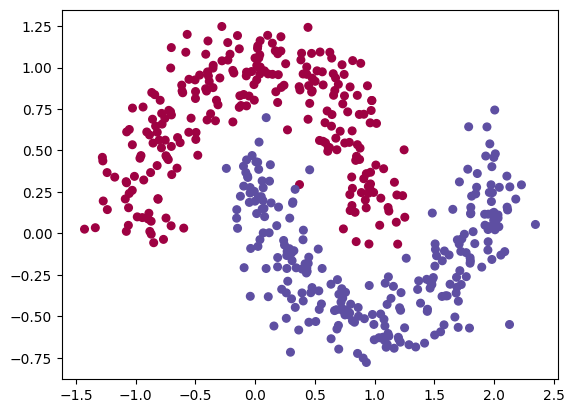

In [2]:
sample_size = 500

X, Y = sklearn.datasets.make_moons(sample_size, noise=0.15)
plt.scatter(X[:,0], X[:,1], s=30, c=Y, cmap=plt.cm.Spectral)
plt.show()

In [3]:
print(X.shape, Y.shape)

(500, 2) (500,)


In [4]:
print(X[:5])
print(Y[:5])

[[ 0.80895293  0.3401612 ]
 [-0.02521888  0.46945056]
 [ 0.47835949  0.93582432]
 [ 2.03489779  0.09307295]
 [ 0.2656127  -0.21112243]]
[0 1 0 1 1]


# Processing data 

- Change numerical data into tensors
- Create train and test sets

In [5]:
X = torch.from_numpy(X).float()
Y = torch.from_numpy(Y)

In [6]:
print(X.shape, Y.shape)

torch.Size([500, 2]) torch.Size([500])


In [7]:
split = int(0.7 * len(X))

train_X, train_Y = X[:split], Y[:split]
test_X, test_Y = X[split:], Y[split:]

# Building model

In [8]:
class FFN(nn.Module):

  def __init__(self, in_dim, hid_dim, out_dim, activation_func):
    super(FFN, self).__init__()

    self.linear = nn.Linear(in_dim, hid_dim)
    self.activation = activation_func
    self.linear_out = nn.Linear(hid_dim, out_dim)

  def forward(self, X):
    hid = self.activation(self.linear(X))
    logits = self.linear_out(hid)
    return logits

# Training model

In [9]:
def avg_accuracy(Y, logits):
  Ypred = logits.argmax(dim=1)
  return (Y == Ypred).float().mean()


def train_loop(model, X, Y, optimizer, criterion):
  model.train()

  optimizer.zero_grad()  
  logits = model(X)
  loss = criterion(logits, Y)
  loss.backward()    
  optimizer.step()

  accu = avg_accuracy(Y, logits)
  return loss, accu


def evaluate(model, X, Y, criterion):
  model.eval()
  
  logits = model(X)
  loss = criterion(logits, Y)
  accu = avg_accuracy(Y, logits)
  return loss, accu

In [10]:
model = FFN(2, 10, 2, torch.sigmoid)

num_epoch = 5000
print_freq = num_epoch // 20 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


for epoch in range(1, num_epoch+1):
    
    train_loss, train_accu = train_loop(model, train_X, train_Y, optimizer, criterion)
    
    if epoch in [1, num_epoch+1] or epoch % print_freq == 0:   
      test_loss, test_accu = evaluate(model, test_X, test_Y, criterion)   
      print("Epoch: {}, Train loss: {}, Train accu: {}, Test loss: {}, Test accu: {}".format(
          epoch, train_loss, train_accu, test_loss, test_accu))

Epoch: 1, Train loss: 0.6884208917617798, Train accu: 0.4942857027053833, Test loss: 0.6799265742301941, Test accu: 0.5133333206176758
Epoch: 250, Train loss: 0.2745349109172821, Train accu: 0.8600000143051147, Test loss: 0.23361548781394958, Test accu: 0.8866666555404663
Epoch: 500, Train loss: 0.26752007007598877, Train accu: 0.8628571629524231, Test loss: 0.217983677983284, Test accu: 0.8866666555404663
Epoch: 750, Train loss: 0.26647716760635376, Train accu: 0.8628571629524231, Test loss: 0.21787653863430023, Test accu: 0.8866666555404663
Epoch: 1000, Train loss: 0.261570006608963, Train accu: 0.868571400642395, Test loss: 0.21517008543014526, Test accu: 0.8866666555404663
Epoch: 1250, Train loss: 0.24130423367023468, Train accu: 0.8771428465843201, Test loss: 0.20097768306732178, Test accu: 0.8999999761581421
Epoch: 1500, Train loss: 0.11019440740346909, Train accu: 0.9685714244842529, Test loss: 0.09035960584878922, Test accu: 0.9800000190734863
Epoch: 1750, Train loss: 0.0464915

# Visualizing the decision boundary

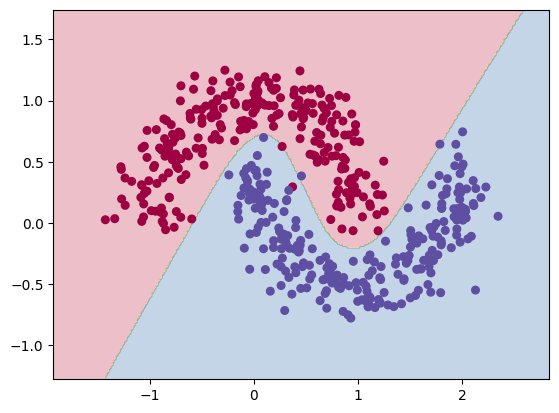

In [11]:
interval = 0.01
x_range = [X[:, 0].min() - .5, X[:, 0].max() + .5]
y_range = [X[:, 1].min() - .5, X[:, 1].max() + .5]
xx, yy = torch.meshgrid(torch.arange(*x_range, interval), torch.arange(*y_range, interval), indexing="ij")
Z = model(torch.vstack([xx.ravel(), yy.ravel()]).transpose(1, 0)).argmax(dim=1).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X[:,0], X[:,1], s=30, c=Y, cmap=plt.cm.Spectral)

plt.show()